In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ten_years_stock_hdfc.csv')

In [3]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,"Jan 25, 2024",1444.25,1452.50,1453.45,1442.25,8.67M,-0.80%
1,"Jan 24, 2024",1455.90,1380.25,1458.45,1380.25,43.00M,2.00%
2,"Jan 23, 2024",1427.35,1465.00,1474.70,1425.00,57.73M,-3.48%
3,"Jan 20, 2024",1478.85,1483.20,1495.70,1476.00,12.92M,0.56%
4,"Jan 19, 2024",1470.65,1505.95,1510.25,1468.40,54.80M,-1.04%


In [4]:
df2 = {
       'Date': df['Date'],
        'Price':df['Price'],
        'Open':df['Open'],
        'High':df['High'],
        'Low':df['Low'],
        'Volume':df['Volume'],
        'Chg%':df['Chg%']
}

In [5]:
df2 = pd.DataFrame(df2)

In [6]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [7]:
df2['Volume'] = df2['Volume'].replace({'M': '', 'K': 'e3'}, regex=True).astype(float)
df2['Chg%'] = df2['Chg%'].str.replace('%', '').astype(float)

In [8]:
df2.set_index('Date', inplace=True)

In [9]:
df2

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2024-01-25,1444.25,1452.50,1453.45,1442.25,8.67,-0.80
2024-01-24,1455.90,1380.25,1458.45,1380.25,43.00,2.00
2024-01-23,1427.35,1465.00,1474.70,1425.00,57.73,-3.48
2024-01-20,1478.85,1483.20,1495.70,1476.00,12.92,0.56
2024-01-19,1470.65,1505.95,1510.25,1468.40,54.80,-1.04
...,...,...,...,...,...,...
2014-01-31,313.55,314.30,317.44,311.86,4.81,-0.52
2014-01-30,315.20,318.04,319.24,313.13,5.71,-2.11
2014-01-29,322.01,323.03,324.73,319.56,5.49,0.16


In [10]:
df2.index

DatetimeIndex(['2024-01-25', '2024-01-24', '2024-01-23', '2024-01-20',
               '2024-01-19', '2024-01-18', '2024-01-17', '2024-01-16',
               '2024-01-15', '2024-01-12',
               ...
               '2014-02-07', '2014-02-06', '2014-02-05', '2014-02-04',
               '2014-02-03', '2014-01-31', '2014-01-30', '2014-01-29',
               '2014-01-28', '2014-01-27'],
              dtype='datetime64[ns]', name='Date', length=2472, freq=None)

<Axes: xlabel='Date'>

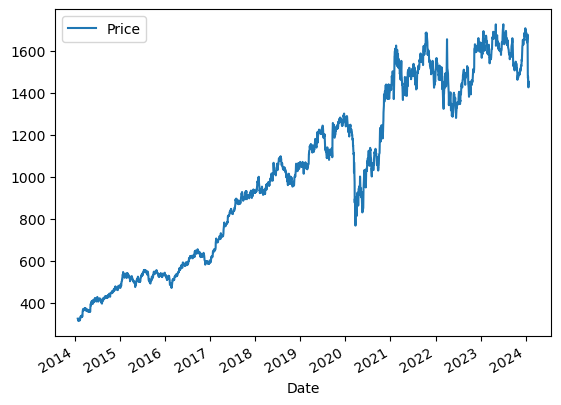

In [11]:
df2.plot.line(y='Price', use_index=True)

In [12]:
df2["Tommorow"] = df2["Price"].shift(-1)

In [13]:
df2

,Price,Open,High,Low,Volume,Chg%,Tommorow
Date,,,,,,,
2024-01-25,1444.25,1452.50,1453.45,1442.25,8.67,-0.80,1455.90
2024-01-24,1455.90,1380.25,1458.45,1380.25,43.00,2.00,1427.35
2024-01-23,1427.35,1465.00,1474.70,1425.00,57.73,-3.48,1478.85
2024-01-20,1478.85,1483.20,1495.70,1476.00,12.92,0.56,1470.65
2024-01-19,1470.65,1505.95,1510.25,1468.40,54.80,-1.04,1486.15
...,...,...,...,...,...,...,...
2014-01-31,313.55,314.30,317.44,311.86,4.81,-0.52,315.20
2014-01-30,315.20,318.04,319.24,313.13,5.71,-2.11,322.01
2014-01-29,322.01,323.03,324.73,319.56,5.49,0.16,321.51


In [14]:
df2['Target'] = (df2['Tommorow'] > df2['Price']).astype(int)

In [15]:
df2

,Price,Open,High,Low,Volume,Chg%,Tommorow,Target
Date,,,,,,,,
2024-01-25,1444.25,1452.50,1453.45,1442.25,8.67,-0.80,1455.90,1
2024-01-24,1455.90,1380.25,1458.45,1380.25,43.00,2.00,1427.35,0
2024-01-23,1427.35,1465.00,1474.70,1425.00,57.73,-3.48,1478.85,1
2024-01-20,1478.85,1483.20,1495.70,1476.00,12.92,0.56,1470.65,0
2024-01-19,1470.65,1505.95,1510.25,1468.40,54.80,-1.04,1486.15,1
...,...,...,...,...,...,...,...,...
2014-01-31,313.55,314.30,317.44,311.86,4.81,-0.52,315.20,1
2014-01-30,315.20,318.04,319.24,313.13,5.71,-2.11,322.01,1
2014-01-29,322.01,323.03,324.73,319.56,5.49,0.16,321.51,0


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df2.iloc[:-100] # ALl rows execpt last hundred rows
test = df2.iloc[-100:] # Last hundred rows

predictors = ['Price', 'Open', 'High', 'Low', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [29]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [30]:
preds = pd.Series(preds, index=test.index)

In [31]:
precision_score(test['Target'], preds)

0.45714285714285713

In [32]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

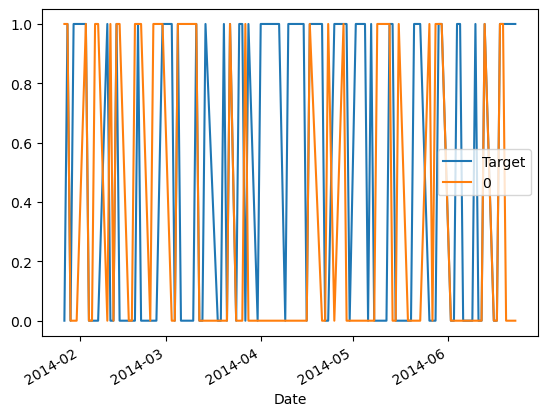

In [33]:
combined.plot()

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [35]:
def backtest(data, model, predictors, start=1250, step=125):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [36]:
predictions = backtest(df2, model, predictors)

In [38]:
predictions['Predictions'].value_counts()

0    612
1    610
Name: Predictions, dtype: int64

In [40]:
precision_score(predictions['Target'], predictions['Predictions'])

0.519672131147541

In [41]:
predictions['Target'].value_counts() / predictions.shape[0]

0    0.523732
1    0.476268
Name: Target, dtype: float64

In [43]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_average = df2.rolling(horizon).mean()
    
    ratio_column = f'Close_Ratio_{horizon}'
    df2[ratio_column] = df2['Price'] / rolling_average['Price']
    
    trend_column = f'Trend_{horizon}'
    df2[trend_column] = df2.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [44]:
df2

,Price,Open,High,Low,Volume,Chg%,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2024-01-25,1444.25,1452.50,1453.45,1442.25,8.67,-0.80,1455.90,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-24,1455.90,1380.25,1458.45,1380.25,43.00,2.00,1427.35,0,1.004017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-23,1427.35,1465.00,1474.70,1425.00,57.73,-3.48,1478.85,1,0.990098,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-20,1478.85,1483.20,1495.70,1476.00,12.92,0.56,1470.65,0,1.017721,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-19,1470.65,1505.95,1510.25,1468.40,54.80,-1.04,1486.15,1,0.997220,1.0,1.010478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-31,313.55,314.30,317.44,311.86,4.81,-0.52,315.20,1,1.001597,1.0,0.991306,1.0,0.896691,29.0,0.749883,116.0,0.524859,471.0
2014-01-30,315.20,318.04,319.24,313.13,5.71,-2.11,322.01,1,1.002624,2.0,1.001322,2.0,0.903242,29.0,0.755353,117.0,0.528165,471.0
2014-01-29,322.01,323.03,324.73,319.56,5.49,0.16,321.51,0,1.010687,2.0,1.020369,3.0,0.924427,29.0,0.773131,118.0,0.540132,471.0


In [45]:
df2 = df2.dropna()

In [46]:
df2

,Price,Open,High,Low,Volume,Chg%,Tommorow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2020-01-16,1287.65,1282.05,1291.00,1279.35,3.58,0.26,1284.25,0,1.003703,2.0,1.020988,4.0,1.169427,36.0,1.136796,121.0,0.899813,487.0
2020-01-15,1284.25,1286.40,1287.95,1274.10,5.89,-0.41,1289.50,1,0.998678,1.0,1.011332,4.0,1.158954,36.0,1.134533,120.0,0.897545,486.0
2020-01-14,1289.50,1289.00,1292.55,1277.50,3.94,0.27,1286.00,0,1.002040,1.0,1.008296,4.0,1.156834,36.0,1.139901,120.0,0.901301,487.0
2020-01-13,1286.00,1282.70,1296.50,1276.00,3.73,0.26,1282.70,0,0.998641,1.0,1.000693,3.0,1.147501,35.0,1.137591,119.0,0.898975,486.0
2020-01-10,1282.70,1284.10,1286.90,1275.10,4.61,0.89,1271.40,0,0.998715,0.0,0.997418,2.0,1.137893,35.0,1.135350,119.0,0.896786,486.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-03,312.55,314.28,316.30,311.86,2.39,-0.32,313.55,1,0.996731,0.0,0.982176,1.0,0.891961,28.0,0.745961,115.0,0.522649,471.0
2014-01-31,313.55,314.30,317.44,311.86,4.81,-0.52,315.20,1,1.001597,1.0,0.991306,1.0,0.896691,29.0,0.749883,116.0,0.524859,471.0
2014-01-30,315.20,318.04,319.24,313.13,5.71,-2.11,322.01,1,1.002624,2.0,1.001322,2.0,0.903242,29.0,0.755353,117.0,0.528165,471.0


In [48]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [49]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [51]:
predictions = backtest(df2, model, new_predictors)

In [52]:
predictions['Predictions'].value_counts()

0.0    199
1.0     22
Name: Predictions, dtype: int64

In [53]:
precision_score(predictions['Target'], predictions['Predictions'])

0.6363636363636364